In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from matplotlib import pyplot as plt
from IPython.display import display, Markdown
import re
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

#### Load game dataset

In [72]:
games = pd.read_csv('raw_data/games.csv')

In [73]:
def print_missing_values(df):
    df_null = pd.DataFrame(len(df) - df.notnull().sum(), columns = ['Count'])
    df_null = df_null[df_null['Count'] > 0].sort_values(by='Count', ascending=False)
    df_null = df_null/len(df)*100

    if len(df_null) == 0:
        display(Markdown('No missing value.'))
        return

    x = df_null.index.values
    height = [e[0] for e in df_null.values]

    fig, ax = plt.subplots(figsize=(20, 5))
    ax.bar(x, height, width=0.8)
    plt.xticks(x, x, rotation=60)
    plt.xlabel('Columns')
    plt.ylabel('Percentage')
    plt.title('Percentage of missing values in columns')
    plt.show()

In [74]:
def dataset_overview(df, df_name):
    display(Markdown(f'### {df_name} dataset overview'))
    display(Markdown(f'dataset shape : {df.shape}'))
    display(Markdown(f'#### Display 5 first rows'))
    display(df.head())
    display(Markdown('*****'))
    display(Markdown(f'#### Describe dataset'))
    display(df.describe().T)
    display(Markdown('*****'))
    display(Markdown(f'#### Missing values'))
    print_missing_values(df)

### Games dataset overview

dataset shape : (25024, 21)

#### Display 5 first rows

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2021-11-17,22100213,Final,1610612766,1610612764,2021,1610612766,97.0,0.438,0.500,...,30.0,59.0,1610612764,87.0,0.367,0.813,0.190,23.0,48.0,1
1,2021-11-17,22100214,Final,1610612765,1610612754,2021,1610612765,97.0,0.425,0.750,...,16.0,42.0,1610612754,89.0,0.418,0.737,0.243,14.0,43.0,1
2,2021-11-17,22100215,Final,1610612737,1610612738,2021,1610612737,110.0,0.506,0.833,...,28.0,40.0,1610612738,99.0,0.440,0.824,0.268,24.0,42.0,1
3,2021-11-17,22100216,Final,1610612751,1610612739,2021,1610612751,109.0,0.458,0.840,...,29.0,47.0,1610612739,99.0,0.393,0.857,0.250,20.0,50.0,1
4,2021-11-17,22100217,Final,1610612748,1610612740,2021,1610612748,113.0,0.483,0.824,...,29.0,39.0,1610612740,98.0,0.440,0.786,0.286,18.0,38.0,1


*****

#### Describe dataset

,count,mean,std,min,25%,50%,75%,max
GAME_ID,25024.0,2.167942e+07,5.579698e+06,1.030000e+07,2.060090e+07,2.120001e+07,2.170012e+07,5.200021e+07
HOME_TEAM_ID,25024.0,1.610613e+09,8.636816e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
VISITOR_TEAM_ID,25024.0,1.610613e+09,8.656774e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
SEASON,25024.0,2.011514e+03,5.228157e+00,2.003000e+03,2.007000e+03,2.012000e+03,2.016000e+03,2.021000e+03
TEAM_ID_home,25024.0,1.610613e+09,8.636816e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
PTS_home,24925.0,1.028532e+02,1.312477e+01,3.600000e+01,9.400000e+01,1.020000e+02,1.110000e+02,1.680000e+02
FG_PCT_home,24925.0,4.601766e-01,5.669479e-02,2.500000e-01,4.210000e-01,4.590000e-01,5.000000e-01,6.840000e-01
FT_PCT_home,24925.0,7.592024e-01,1.006755e-01,1.430000e-01,6.960000e-01,7.650000e-01,8.280000e-01,1.000000e+00
FG3_PCT_home,24925.0,3.560244e-01,1.127857e-01,0.000000e+00,2.860000e-01,3.570000e-01,4.290000e-01,1.000000e+00
AST_home,24925.0,2.266676e+01,5.168521e+00,6.000000e+00,1.900000e+01,2.200000e+01,2.600000e+01,5.000000e+01


*****

#### Missing values

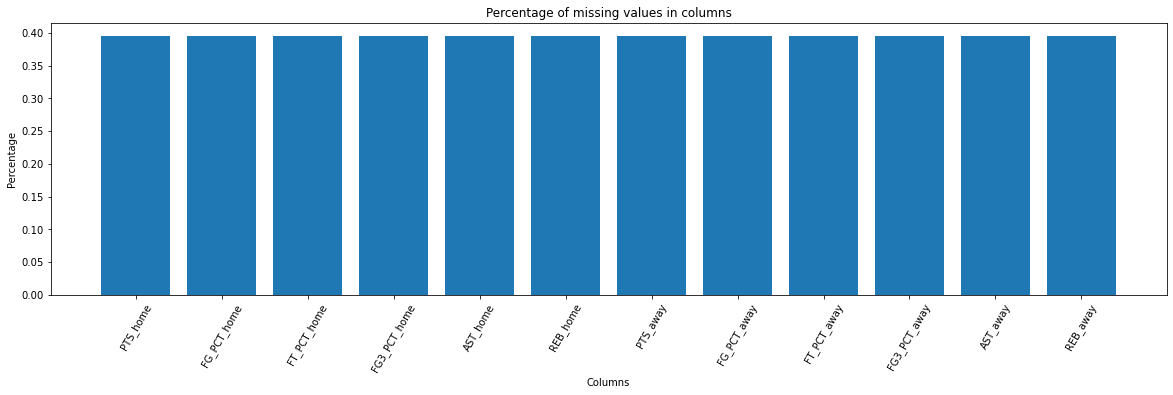

In [75]:
dataset_overview(games,'Games')

#### Clean dataset from duplicated value

In [76]:
games[games['GAME_ID'].duplicated()].shape

(44, 21)

In [77]:
print(games[games.duplicated()].shape)
games.drop_duplicates(subset=['GAME_ID'],inplace=True)
print("Shape of df after dropped duplicates")
games[games['GAME_ID'].duplicated()]

(15, 21)
Shape of df after dropped duplicates


,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS


In [78]:
games.reset_index(inplace=True, drop=True)

In [79]:
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2021-11-17,22100213,Final,1610612766,1610612764,2021,1610612766,97.0,0.438,0.500,...,30.0,59.0,1610612764,87.0,0.367,0.813,0.190,23.0,48.0,1
1,2021-11-17,22100214,Final,1610612765,1610612754,2021,1610612765,97.0,0.425,0.750,...,16.0,42.0,1610612754,89.0,0.418,0.737,0.243,14.0,43.0,1
2,2021-11-17,22100215,Final,1610612737,1610612738,2021,1610612737,110.0,0.506,0.833,...,28.0,40.0,1610612738,99.0,0.440,0.824,0.268,24.0,42.0,1
3,2021-11-17,22100216,Final,1610612751,1610612739,2021,1610612751,109.0,0.458,0.840,...,29.0,47.0,1610612739,99.0,0.393,0.857,0.250,20.0,50.0,1
4,2021-11-17,22100217,Final,1610612748,1610612740,2021,1610612748,113.0,0.483,0.824,...,29.0,39.0,1610612740,98.0,0.440,0.786,0.286,18.0,38.0,1


In [80]:
# drop not useful colums from games df
cols_name = ['GAME_STATUS_TEXT', 'TEAM_ID_home', 'TEAM_ID_away']
games.drop(labels=cols_name, axis=1, inplace=True)
games.reset_index(inplace=True, drop=True)

In [81]:
# Most of the NaN value is in the season 2003-2004
games[games.isna().any(axis=1)]['SEASON']

17504    2003
17505    2003
17506    2003
17507    2003
17508    2003
         ... 
17598    2003
17599    2003
17600    2003
17607    2003
17608    2003
Name: SEASON, Length: 99, dtype: int64

#### Convert the date of the game from object type to datetime type

In [82]:
games['GAME_DATE_EST'] = pd.to_datetime(games['GAME_DATE_EST'], format='%Y-%m-%d')

### For this analysis, only data with season >= 2010 will be used

In [83]:
games = games[games['SEASON'] > 2009]
print(sorted(list(games['SEASON'].unique())))

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


### For this analysis, all pre-season games from season 2010 to 2021 were removed

In [84]:
preseason_dates = {
    2010: '2010-10-26',
    2011: '2011-12-25',
    2012: '2012-10-30',
    2013: '2013-10-29',
    2014: '2014-10-28',
    2015: '2015-10-27',
    2016: '2016-10-26',
    2017: '2017-10-17',
    2018: '2018-10-16',
    2019: '2019-10-22',
    2020: '2020-12-22',
    2021: '2021-10-19',
}
def remove_preseason_games(df, preseason_year):
    return df.drop(df.index[(df['GAME_DATE_EST'] < preseason_dates[preseason_year]) & (df['SEASON'] == preseason_year)]).reset_index(drop=True)

In [85]:
for season in list(games.SEASON.unique()):
    games = remove_preseason_games(games, season)

In [86]:
# Now no missing value are present in dataset
print_missing_values(games)

No missing value.

In [87]:
# Function that add abbreviation team name to each match
def merge_teams_name_and_games(games_df, teams_df, left_key='', right_key='TEAM_ID', column_name = '', idx_new_column = 0):
    """Def that take in input right_df, left_df and merge them."""
    teams_cols_name = ['TEAM_ID', 'ABBREVIATION']
    result_df = pd.merge(games_df,
                         teams_df[teams_cols_name],
                         how='left',
                         left_on=left_key,
                         right_on=right_key)
    result_df.insert(idx_new_column, column_name, result_df[teams_cols_name[1]])
    result_df.drop(teams_cols_name, axis=1, inplace=True)
    return result_df

In [89]:
teams = pd.read_csv('raw_data/teams.csv') # read team dataset
games = merge_teams_name_and_games(games,
                                    teams,
                                    left_key='HOME_TEAM_ID',
                                    column_name='HOME_TEAM_NAME',
                                    idx_new_column=3)
games = merge_teams_name_and_games(games,
                                    teams,
                                    left_key='VISITOR_TEAM_ID',
                                    column_name='VISITOR_TEAM_NAME',
                                    idx_new_column=5)

## Calculate Elo Ratings
Our data right now contains each teams record before every game. However, record isn't the best way to represent a teams overall skill or strength. It doesn't take into account varaibles such as difficulty of schedule, home court advantage, margin of victory, and more. Therefore, we will use the Elo rating system instead. Elo does take into account all the variables mentioned above to hopefully give a more accurate estimate of a teams strength. The formula we are using for Elo ratings is taken from Nate Silver. He is well known for his sports analytics and has devised a well regarded Elo rating system for ranking NBA teams. His work can be found [here](https://fivethirtyeight.com/features/how-we-calculate-nba-elo-ratings/#:~:text=Here's%20the%20formula%3A%20Take%20the,and%20then%20divide%20by%2028.). We will do our best to explain the Elo rating system below.

In the Elo rating system every team starts with an Elo rating of 1500, then after every game played the winning team recieves points proportional to their probability of winning. At the same time the losing team loses the same amount of points, thus it is a zero sum game in total.

The exact formula is defined as follows. If $R_{i}$ is the current Elo rating of a team, its Elo rating after its played its next game is defined as follows:

$$R_{i+1} = k * (S_{team} - E_{team} + R_{i})$$

In this equation, $S_{team}$ is 1 if the team wins and 0 if the team loses. The value $E_{team}$ is the expected win probability of the team which is defined as:
$$E_{team} = \frac{1}{1+10^{\frac{opp\_elo - team\_elo}{400}}}$$

Here, $k$ is a moving constant that depends on the margin of victory and differnece in Elo ratings. The exact value of the constant is:
$$k = 20\frac{(MOV_{winner} + 3)^{0.8}}{7.5 + 0.006(elo\_difference_{winner})} $$


Finally, Elo ratings carry over from season to season. A team that is very good the season before will likly still be good the next year. Thus, if $R$ is the final Elo rating of a team one year, it will start the next season with an Elo rating of
$$(R * 0.75) + (0.25 * 1505)$$

In [90]:
#Home and road team win probabilities implied by Elo ratings and home court adjustment
import math
def win_probs(home_elo, away_elo, home_court_advantage) :
    h = math.pow(10, home_elo/400)
    r = math.pow(10, away_elo/400)
    a = math.pow(10, home_court_advantage/400)

    denom = r + a*h
    home_prob = a*h / denom
    away_prob = r / denom

    return home_prob, away_prob

    #odds the home team will win based on elo ratings and home court advantage

def home_odds_on(home_elo, away_elo, home_court_advantage) :
    h = math.pow(10, home_elo/400)
    r = math.pow(10, away_elo/400)
    a = math.pow(10, home_court_advantage/400)
    return a*h/r

#this function determines the constant used in the elo rating, based on margin of victory and difference in elo ratings
def elo_k(MOV, elo_diff):
    k = 20
    if MOV>0:
        multiplier= (MOV+3) ** 0.8 / (7.5 + 0.006 * elo_diff)
    else:
        multiplier= (-MOV+3) ** 0.8 / (7.5 + 0.006 * (-elo_diff))
    return k*multiplier


#updates the home and away teams elo ratings after a game

def update_elo(home_score, away_score, home_elo, away_elo, home_court_advantage) :
    home_prob, away_prob = win_probs(home_elo, away_elo, home_court_advantage)

    if home_score - away_score > 0:
        home_win = 1
        away_win = 0
    else :
        home_win = 0
        away_win = 1

    k = elo_k(home_score - away_score, home_elo - away_elo)

    updated_home_elo = home_elo + k * (home_win - home_prob)
    updated_away_elo = away_elo + k * (away_win - away_prob)

    return updated_home_elo, updated_away_elo


#takes into account prev season elo
def get_prev_elo(team, date, season_, games_stats, elo_df) :
    prev_game = games_stats[games_stats['GAME_DATE_EST'] < date][(games_stats['HOME_TEAM_NAME'] == team) | (games_stats['VISITOR_TEAM_NAME'] == team)].sort_values(by ='GAME_DATE_EST').tail(1).iloc[0]

    if team == prev_game['HOME_TEAM_NAME'] :
        elo_rating = elo_df[elo_df['GAME_ID'] == prev_game['GAME_ID']]['ELO_AFTER_home'].values[0]
    else :
        elo_rating = elo_df[elo_df['GAME_ID'] == prev_game['GAME_ID']]['ELO_AFTER_away'].values[0]

    if prev_game['SEASON'] != season_ :
        return (0.75 * elo_rating) + (0.25 * 1505)
    else :
        return elo_rating


In [91]:
team_stats = games.sort_values(by = 'GAME_DATE_EST')
team_stats.reset_index(inplace=True, drop = True)
team_stats

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,HOME_TEAM_NAME,VISITOR_TEAM_ID,VISITOR_TEAM_NAME,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2010-10-26,21000003,1610612747,LAL,1610612745,HOU,2010,112.0,0.417,0.821,0.429,21.0,44.0,110.0,0.418,0.929,0.400,25.0,53.0,1
1,2010-10-26,21000002,1610612757,POR,1610612756,PHX,2010,106.0,0.462,0.667,0.500,31.0,48.0,92.0,0.486,0.688,0.474,15.0,30.0,1
2,2010-10-26,21000001,1610612738,BOS,1610612748,MIA,2010,88.0,0.464,0.640,0.500,25.0,42.0,80.0,0.365,0.720,0.400,15.0,39.0,1
3,2010-10-27,21000004,1610612739,CLE,1610612738,BOS,2010,95.0,0.444,0.810,0.300,24.0,37.0,87.0,0.472,0.762,0.250,24.0,38.0,1
4,2010-10-27,21000005,1610612751,BKN,1610612765,DET,2010,101.0,0.488,0.708,0.429,17.0,44.0,98.0,0.446,0.533,0.421,21.0,37.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14140,2021-11-17,22100218,1610612752,NYK,1610612753,ORL,2021,98.0,0.420,0.667,0.327,25.0,45.0,104.0,0.406,0.833,0.289,20.0,51.0,0
14141,2021-11-17,22100217,1610612748,MIA,1610612740,NOP,2021,113.0,0.483,0.824,0.375,29.0,39.0,98.0,0.440,0.786,0.286,18.0,38.0,1
14142,2021-11-17,22100216,1610612751,BKN,1610612739,CLE,2021,109.0,0.458,0.840,0.375,29.0,47.0,99.0,0.393,0.857,0.250,20.0,50.0,1
14143,2021-11-17,22100223,1610612757,POR,1610612741,CHI,2021,112.0,0.440,0.964,0.355,26.0,44.0,107.0,0.470,0.800,0.448,23.0,36.0,1


In [92]:
elo_df = pd.DataFrame(columns=['GAME_ID', 'HOME_TEAM_NAME', 'VISITOR_TEAM_NAME', 'ELO_BEFORE_home', 'ELO_BEFORE_away', 'ELO_AFTER_home', 'ELO_AFTER_away'])
teams_elo_df = pd.DataFrame(columns=['Game_ID','Team', 'Elo', 'Date', 'Where_Played', 'Season'])

In [93]:
for index, row in team_stats.iterrows():
    game_id = row['GAME_ID']
    game_date = row['GAME_DATE_EST']
    season = row['SEASON']
    h_team, a_team = row['HOME_TEAM_NAME'], row['VISITOR_TEAM_NAME']
    h_score, a_score = row['PTS_home'], row['PTS_away']

    if h_team not in elo_df['HOME_TEAM_NAME'].values and h_team not in elo_df['VISITOR_TEAM_NAME'].values:
        h_team_elo_before = 1500
    else :
        h_team_elo_before = get_prev_elo(h_team, game_date, season, team_stats, elo_df)

    if a_team not in elo_df['HOME_TEAM_NAME'].values and a_team not in elo_df['VISITOR_TEAM_NAME'].values:
        a_team_elo_before = 1500
    else :
        a_team_elo_before = get_prev_elo(a_team, game_date, season, team_stats, elo_df)

    h_team_elo_after, a_team_elo_after = update_elo(h_score, a_score, h_team_elo_before, a_team_elo_before, 69)

    new_row = {'GAME_ID': game_id, 'HOME_TEAM_NAME': h_team, 'VISITOR_TEAM_NAME': a_team, 'ELO_BEFORE_home': h_team_elo_before, 'ELO_BEFORE_away': a_team_elo_before,
               'ELO_AFTER_home' : h_team_elo_after, 'ELO_AFTER_away': a_team_elo_after}
    teams_row_one = {'Game_ID': game_id,'Team': h_team, 'Elo': h_team_elo_before, 'Date': game_date, 'Where_Played': 'Home', 'Season': season}
    teams_row_two = {'Game_ID': game_id,'Team': a_team, 'Elo': a_team_elo_before, 'Date': game_date, 'Where_Played': 'Away', 'Season': season}

    elo_df = elo_df.append(new_row, ignore_index = True)
    teams_elo_df = teams_elo_df.append(teams_row_one, ignore_index=True)
    teams_elo_df = teams_elo_df.append(teams_row_two, ignore_index=True)

/var/folders/6l/8gvxp6ls2bs5lkjqdf8w_kj40000gn/T/ipykernel_87021/2469845460.py:54: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prev_game = games_stats[games_stats['GAME_DATE_EST'] < date][(games_stats['HOME_TEAM_NAME'] == team) | (games_stats['VISITOR_TEAM_NAME'] == team)].sort_values(by ='GAME_DATE_EST').tail(1).iloc[0]


In [94]:
elo_df.drop(['HOME_TEAM_NAME', 'VISITOR_TEAM_NAME', 'ELO_AFTER_home', 'ELO_AFTER_away'], inplace=True, axis=1)

In [95]:
games = pd.merge(games, elo_df, on='GAME_ID')

In [96]:
def reorder_cols(df):
    cols_reordered = ['GAME_DATE_EST',
                    'GAME_ID',
                    'HOME_TEAM_ID',
                    'HOME_TEAM_NAME',
                    'VISITOR_TEAM_ID',
                    'VISITOR_TEAM_NAME',
                    'SEASON',
                    'PTS_home',
                    'FG_PCT_home',
                    'FT_PCT_home',
                    'FG3_PCT_home',
                    'AST_home',
                    'REB_home',
                    'ELO_BEFORE_home',
                    'PTS_away',
                    'FG_PCT_away',
                    'FT_PCT_away',
                    'FG3_PCT_away',
                    'AST_away',
                    'REB_away',
                    'ELO_BEFORE_away',
                    'HOME_TEAM_WINS']
    return df[cols_reordered]

In [97]:
games = reorder_cols(games)
games

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,HOME_TEAM_NAME,VISITOR_TEAM_ID,VISITOR_TEAM_NAME,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,...,REB_home,ELO_BEFORE_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,ELO_BEFORE_away,HOME_TEAM_WINS
0,2021-11-17,22100213,1610612766,CHA,1610612764,WAS,2021,97.0,0.438,0.500,...,59.0,1470.819854,87.0,0.367,0.813,0.190,23.0,48.0,1552.358321,1
1,2021-11-17,22100214,1610612765,DET,1610612754,IND,2021,97.0,0.425,0.750,...,42.0,1350.477922,89.0,0.418,0.737,0.243,14.0,43.0,1505.640628,1
2,2021-11-17,22100215,1610612737,ATL,1610612738,BOS,2021,110.0,0.506,0.833,...,40.0,1536.159014,99.0,0.440,0.824,0.268,24.0,42.0,1513.537935,1
3,2021-11-17,22100216,1610612751,BKN,1610612739,CLE,2021,109.0,0.458,0.840,...,47.0,1584.716761,99.0,0.393,0.857,0.250,20.0,50.0,1450.264258,1
4,2021-11-17,22100217,1610612748,MIA,1610612740,NOP,2021,113.0,0.483,0.824,...,39.0,1577.036926,98.0,0.440,0.786,0.286,18.0,38.0,1407.72303,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14140,2014-10-29,21400014,1610612758,SAC,1610612744,GSW,2014,77.0,0.308,0.743,...,50.0,1433.765444,95.0,0.440,0.719,0.222,21.0,44.0,1588.866054,0
14141,2014-10-29,21400015,1610612757,POR,1610612760,OKC,2014,106.0,0.448,0.773,...,42.0,1561.280294,89.0,0.407,0.808,0.125,19.0,43.0,1612.417031,1
14142,2014-10-28,21400001,1610612740,NOP,1610612753,ORL,2014,101.0,0.406,0.484,...,62.0,1459.749686,84.0,0.381,0.762,0.364,17.0,56.0,1369.322627,1
14143,2014-10-28,21400002,1610612759,SAS,1610612742,DAL,2014,101.0,0.529,0.813,...,38.0,1693.77063,100.0,0.487,0.842,0.381,17.0,33.0,1583.404523,1


<AxesSubplot:>

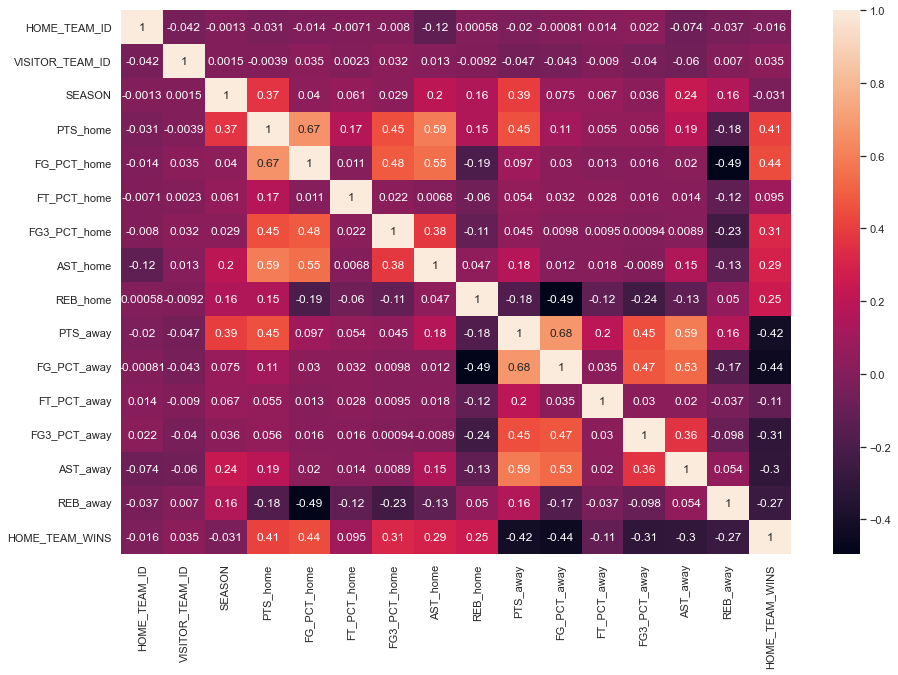

In [98]:
#Correlation Plot
corr_matrix = games.corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(corr_matrix, annot=True)

In [99]:
games.reset_index(inplace=True, drop=True)
games.to_csv('curated_data/games.csv', index=False)